In [1]:
#import module (library)

import pandas as pd
import pycaret
import numpy as np
import math
import matplotlib.pyplot as plt
from pycaret.regression import *

from pycaret.regression import load_model

import plotly.io as pio
pio.renderers.default = 'iframe_connected'

import time
import datetime

# import module (user defined function)

from py_module.load_data import load_data
from py_module.plot_data import plot_histogram
from py_module.regression import *
from py_module.pre_processing import *
from py_module.verify import *
from py_module.etc import *
from py_module.compare import *

In [2]:
# import raw_data (from csv file)

filename = "./Data_2021_10_14_v1 (N98923)/Data.csv" # csv file directory and name

raw_data = load_data(fn=filename, pp=1, size_en=True, size=1000)

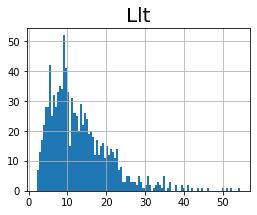

In [3]:
# plot raw_data histogram (for data pre-process / option-task)

## - parameter
# input : N1, N2, d1, d2, freq, move_tx, move_rx, offset_tx, offset_rx, per, space1, space2, space3, space4, l1, l2, h1, w1
# output : Lmt, Lmr, Llt, Llr, k, R1, R2

## - opt
# bins : (default : 100)
# plt_size : (default : [6,5])
# grid_en : (default : False)
# title_en : (default : False)
# title : (default : "")
# fontsize : (default : {}) (see : https://www.delftstack.com/ko/howto/matplotlib/how-to-set-the-figure-title-and-axes-labels-font-size-in-matplotlib/)

parameter = "Llt" # desired parameter as a histogram
title = parameter # plot title name
fontsize = {'axes.titlesize' : 20, 'xtick.labelsize' : 10, 'ytick.labelsize' : 10}


plot_histogram(raw_data, parameter, plt_size=[4,3], grid_en=True, title_en=True, title=title, fontsize=fontsize)

In [3]:
## === dataset pre-processing ===

# drop output data except for target output

parameter = "Llt" # target output pamareter
processed_data = drop_output(raw_data, parameter)



# cut data
## - opt
# lo : lower bound value (default : -inf)
# hi : upper bound value (default : inf)

processed_data = cut_data(processed_data, parameter="Llt", lo=0.1, hi=40)



# add feature
# 기존에 존재하는 input parameter들을 이용해서 물리적인 의미를 갖는 새로운 파라미터를 만들어 낼 시 모델의 성능을 증가시킬 수 있음
# ex> 변압기 자화 인덕턴스는 턴수의 제곱에 비례하므로 턴수의 제곱에 해당하는 파라미터를 새로 만들어 자화인덕터 regression 모델을 만들 경우 모델 성능 증가

new_feature_names = []

processed_data = add_feature(processed_data, parameter, new_feature_names = new_feature_names)



processed_data




,N1,N2,d1,d2,freq,move_tx,move_rx,offset_tx,offset_rx,per,space1,space2,space3,space4,l1,l2,h1,w1,Llt
0,10,10,11.9,5.0,44000.0,2,6,11,-12,4725,7,37,7,54,35,49,226,240,23.949053
1,4,4,8.3,5.0,30000.0,5,6,19,-11,3715,4,54,4,20,31,70,123,100,5.519117
2,5,5,10.4,5.5,36000.0,5,6,7,-13,1970,1,42,5,39,31,53,150,162,8.434819
3,6,6,5.3,10.9,35000.0,6,4,14,-1,2432,3,33,7,40,19,72,106,222,9.588108
4,10,10,3.0,3.9,29000.0,7,3,12,-19,3984,3,58,7,31,27,71,189,32,19.090857
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
983,9,9,6.3,8.8,48000.0,2,1,8,-18,3149,2,33,9,33,29,62,181,161,17.609107
984,11,11,8.9,3.2,55000.0,4,3,16,-15,1471,9,26,2,47,21,63,193,236,30.430860
985,6,6,9.2,4.7,25000.0,1,6,9,-9,3627,9,42,9,48,20,51,115,193,11.809175
986,9,9,6.7,6.7,48000.0,3,1,3,-19,2827,8,52,3,24,15,73,135,237,26.445698


In [9]:
# regression data

## - opt
# algorithm : regression algorithm (default : "ligthgbm")
# frac_ratio : train set / test set ratio (default : 0.9)
# silent : (default : True)
# save_en : whether to save the trained model as a file (.pkl) : (default : False)
# save_model_name : model file name : (default : "model")
# new_feature_names : to avoid number of features error (default : [])

## - algorithm list (see detail : https://pycaret.readthedocs.io/en/latest/api/regression.html)
# 'lr' - Linear Regression
# 'lasso' - Lasso Regression
# 'ridge' - Ridge Regression
# 'en' - Elastic Net
# 'lar' - Least Angle Regression
# 'llar' - Lasso Least Angle Regression
# 'omp' - Orthogonal Matching Pursuit
# 'br' - Bayesian Ridge
# 'ard' - Automatic Relevance Determination
# 'par' - Passive Aggressive Regressor
# 'ransac' - Random Sample Consensus
# 'tr' - TheilSen Regressor
# 'huber' - Huber Regressor
# 'kr' - Kernel Ridge
# 'svm' - Support Vector Regression
# 'knn' - K Neighbors Regressor
# 'dt' - Decision Tree Regressor
# 'rf' - Random Forest Regressor
# 'et' - Extra Trees Regressor
# 'ada' - AdaBoost Regressor
# 'gbr' - Gradient Boosting Regressor
# 'mlp' - MLP Regressor
# 'xgboost' - Extreme Gradient Boosting
# 'lightgbm' - Light Gradient Boosting Machine
# 'catboost' - CatBoost Regressor


[model, data_seen, data_unseen] = regression_basic(processed_data, parameter, algorithm="lightgbm", frac_ratio=0.9, save_en=False, save_model_name="model", new_feature_names=new_feature_names)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.1339,0.0488,0.2210,0.9890,0.0547,0.0860
1,0.1360,0.0483,0.2198,0.9894,0.0562,0.0896
2,0.1346,0.0433,0.2080,0.9902,0.0541,0.0867
3,0.1371,0.0488,0.2209,0.9893,0.0567,0.0855
4,0.1357,0.0393,0.1982,0.9912,0.0516,0.0859
5,0.1361,0.0416,0.2038,0.9907,0.0563,0.0895
6,0.1387,0.0455,0.2133,0.9899,0.0534,0.0860
7,0.1414,0.0504,0.2246,0.9891,0.0562,0.0880
8,0.1381,0.0497,0.2229,0.9890,0.0555,0.0857
9,0.1390,0.0442,0.2102,0.9904,0.0520,0.0857


In [10]:
# verify model

verify_model(model, data_seen, data_unseen, parameter)

array([0.99042782, 0.12938798, 0.0429489 , 0.20724116, 8.23238559])

In [11]:
# tune model

## - opt
# n_iter : (default : 10)
# optimize : (default : "R2")
# early_stopping : (default : False)
# choose_better : (default : False)
# verbose : (default : False)

tuned_model = tune_model(model, n_iter=10000, optimize="MAE", early_stopping=False, choose_better=True, verbose=True)

verify_model(tuned_model, data_seen, data_unseen, parameter)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.0835,0.0286,0.1690,0.9935,0.0348,0.0426
1,0.0831,0.0277,0.1666,0.9939,0.0371,0.0450
2,0.0837,0.0220,0.1485,0.9950,0.0333,0.0425
3,0.0838,0.0263,0.1621,0.9943,0.0367,0.0420
4,0.0829,0.0170,0.1305,0.9962,0.0293,0.0435
5,0.0817,0.0197,0.1405,0.9956,0.0344,0.0435
6,0.0831,0.0226,0.1504,0.9950,0.0319,0.0414
7,0.0853,0.0272,0.1649,0.9941,0.0345,0.0434
8,0.0845,0.0273,0.1651,0.9940,0.0363,0.0431
9,0.0844,0.0218,0.1478,0.9953,0.0306,0.0415


array([0.99630842, 0.06721511, 0.01656355, 0.12869947, 3.72980966])

In [12]:
array([0.99536475, 0.0737844 , 0.02079766, 0.14421394, 3.80649947])

NameError: name 'array' is not defined

In [ ]:
algorithm_list = models().index

algorithm_list[algorithm_list!="lr"]

Index(['lasso', 'ridge', 'en', 'lar', 'llar', 'omp', 'br', 'ard', 'par',
       'ransac', 'tr', 'huber', 'kr', 'svm', 'knn', 'dt', 'rf', 'et', 'ada',
       'gbr', 'mlp', 'lightgbm'],
      dtype='object', name='ID')

,Description,Value
0,session_id,123
1,Target,Llt
2,Original Data,"(894, 19)"
3,Missing Values,False
4,Numeric Features,18
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(625, 18)"


IntProgress(value=0, description='Processing: ', max=4)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,15:59:47
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Light Gradient Boosting Machine


,MAE,MSE,RMSE,R2,RMSLE,MAPE


In [6]:
# compare algorithm (tuned case)
# 여러 regression 알고리즘 중 가장 높은 성능을 내는 알고리즘 탐색 (모든 알고리즘 탐색)
# 각각의 algorithm은 auto tune을 이용하여 튜닝

# activate logger
[model, data_seen, data_unseen] = regression_basic(processed_data, parameter, algorithm="lightgbm", frac_ratio=0.9, save_en=False, save_model_name="model", new_feature_names=new_feature_names)


# variable
algorithm_list = models().index
except_list = ["kr","svm","huber","rf","et"] # algorithm list to exclude from train
result = []


# eleminate algorithm in exception list
for al_name in except_list :

    algorithm_list = algorithm_list[algorithm_list!=al_name]

algorithm_list = ["lightgbm"]
    
# train each algorithm
for al_name in algorithm_list :

    start_time = time.time()

    [model, data_seen, data_unseen] = regression_basic(processed_data, parameter, algorithm=al_name, new_feature_names=new_feature_names)
    print(f'{al_name}')
    tuned_model = tune_model(model, n_iter=1000, optimize="MAE", early_stopping=False, choose_better=True, verbose=True, search_library="tune-sklearn", search_algorithm="hyperopt")
    [R2, MAE, MSE, RMSE, MPE] = verify_model(tuned_model, data_seen, data_unseen, parameter)

    end_time= time.time()
    timetime = end_time - start_time

    result.append([al_name, R2, MAE, MSE, RMSE, MPE, timetime])


# compare model result
pd.DataFrame(result,columns = ["algorithm","R2","MAE","MSE","RMSE","MPE(%)","time(s)"]).sort_values(by='R2' ,ascending=False).reset_index(drop=True)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,0.4519,0.4741,0.6885,0.9910,0.0451,0.0381
1,0.4594,0.4840,0.6957,0.9909,0.0440,0.0372
2,0.4724,0.5061,0.7114,0.9908,0.0454,0.0385
3,0.4482,0.5251,0.7247,0.9897,0.0456,0.0372
4,0.4595,0.4827,0.6947,0.9908,0.0446,0.0372
5,0.4623,0.5190,0.7204,0.9900,0.0453,0.0379
6,0.4551,0.5082,0.7129,0.9904,0.0460,0.0376
7,0.4551,0.4620,0.6797,0.9911,0.0449,0.0380
8,0.4621,0.6162,0.7850,0.9882,0.0508,0.0389
9,0.4544,0.5188,0.7203,0.9904,0.0458,0.0379


,algorithm,R2,MAE,MSE,RMSE,MPE(%),time(s)
0,lightgbm,0.994276,0.353861,0.308245,0.555198,3.077425,1260.369085


In [15]:
# compare algorithm (tuned case)
# 여러 regression 알고리즘 중 가장 높은 성능을 내는 알고리즘 탐색 (모든 알고리즘 탐색)
# 각각의 algorithm은 auto tune을 이용하여 튜닝

# activate logger
[model, data_seen, data_unseen] = regression_basic(processed_data, parameter, algorithm="lightgbm", frac_ratio=0.9, save_en=False, save_model_name="model", new_feature_names=new_feature_names)


# variable
algorithm_list = models().index
except_list = ["kr","svm"] # algorithm list to exclude from train
low_list = ["et","rf"]
result = []
error_list = []


# eleminate algorithm in exception list
for al_name in except_list :

    algorithm_list = algorithm_list[algorithm_list!=al_name]

# algorithm_list = ["lightgbm"]
    
# train each algorithm
for al_name in algorithm_list :

    start_time = time.time()

    [model, data_seen, data_unseen] = regression_basic(processed_data, parameter, algorithm=al_name, new_feature_names=new_feature_names)
    print(f'{al_name}')

    try :
        if find_element(low_list,al_name) == False :
            tuned_model = tune_model(model, n_iter=1000, optimize="MAE", early_stopping=False, choose_better=True, verbose=True)
        elif find_element(low_list,al_name) == True :
            tuned_model = tune_model(model, n_iter=100, optimize="MAE", early_stopping=False, choose_better=True, verbose=False)
    except :
        error_list.append([al_name])
    

    [R2, MAE, MSE, RMSE, MPE] = verify_model(tuned_model, data_seen, data_unseen, parameter)

    end_time= time.time()
    timetime = end_time - start_time

    result.append([al_name, R2, MAE, MSE, RMSE, MPE, timetime])


# compare model result
pd.DataFrame(result,columns = ["algorithm","R2","MAE","MSE","RMSE","MPE(%)","time(s)"]).sort_values(by='R2' ,ascending=False).reset_index(drop=True)


,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.2565,3.2726,1.8090,0.8992,0.1203,0.1055
1,1.3493,3.3003,1.8167,0.9379,0.1727,0.1260
2,1.4177,3.7569,1.9383,0.9515,0.1781,0.1250
3,1.2956,3.9582,1.9895,0.9350,0.1250,0.0995
4,1.3990,5.7123,2.3900,0.8850,0.1540,0.1329
5,1.4948,4.2980,2.0732,0.9357,0.1405,0.1288
6,1.8220,5.3903,2.3217,0.9034,0.2217,0.1753
7,1.1309,2.2820,1.5106,0.9489,0.1139,0.0984
8,1.4769,4.5349,2.1295,0.9169,0.1407,0.1239
9,1.6520,6.6744,2.5835,0.8972,0.1527,0.1311


,algorithm,R2,MAE,MSE,RMSE,MPE(%),time(s)
0,lightgbm,0.978260,0.776327,1.493544,1.222107,7.302500,18.133293
1,gbr,0.973637,0.784957,1.811105,1.345773,6.856097,52.733052
2,et,0.968546,0.567584,2.160864,1.469988,6.425165,242.576254
3,rf,0.951429,1.295477,3.336808,1.826693,12.520808,382.226554
4,lasso,0.890746,2.050517,7.505722,2.739657,24.308018,4.607937
5,en,0.890561,2.060654,7.518411,2.741972,24.645211,4.824211
6,lar,0.890561,2.060654,7.518411,2.741972,24.645211,7.198985
7,lr,0.890290,2.083134,7.537075,2.745373,25.415727,6.057175
8,br,0.890071,2.072851,7.552088,2.748106,25.025122,4.378741
9,tr,0.888869,2.076344,7.634671,2.763091,24.649251,7.430348


In [4]:
# activate logger
[model, data_seen, data_unseen] = regression_basic(processed_data, parameter, algorithm="lightgbm", frac_ratio=0.9, save_en=False, save_model_name="model", new_feature_names=new_feature_names)

algorithm_list = models().index
except_list = ["kr","svm"] # algorithm list to exclude from train
# eleminate algorithm in exception list
for al_name in except_list :
    algorithm_list = algorithm_list[algorithm_list!=al_name]
low_list = ["et","rf"]

compare_algorithm(parameter="Llt", data=processed_data, algorithm_list=algorithm_list, low_list=low_list, tune_en=True, n_h=100, n_l=10)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,1.5072,4.5178,2.1255,0.9172,0.1300,0.1111
1,1.5292,4.1425,2.0353,0.9199,0.1415,0.1360
2,1.2754,2.4757,1.5735,0.9358,0.1231,0.1206
3,1.4812,3.7098,1.9261,0.9212,0.1337,0.1151
4,1.4533,5.3370,2.3102,0.9020,0.1429,0.1300
5,1.4665,5.0734,2.2524,0.9266,0.1251,0.1110
6,1.5189,4.4546,2.1106,0.8656,0.1988,0.1894
7,1.2720,2.9766,1.7253,0.9228,0.1412,0.1292
8,1.3631,3.9402,1.9850,0.9434,0.1446,0.1189
9,1.3844,3.3119,1.8199,0.9175,0.1435,0.1290


Transformation Pipeline and Model Successfully Saved


In [14]:
find_element(low_list,["et"])

True